Przeprowadzić analizę mocy wybranych testów statystycznych w różnych warunkach. Badaniu poddane zostaną testy Kołmogorowa, Lillieforsa, Andersona-Darlinga oraz test Kołmogorowa-Smirnowa, zarówno w klasycznej wersji, jak i z wykorzystaniem transformacji PIT (probability integral transform).

# Zdanie 1
Wpływ rozkładu danych na moc testów 
Zbadanie mocy testów w przypadku, gdy dane pochodzą z różnych rozkładów:

- Rozkład t-Studenta (z uwzględnieniem liczby stopni swobody),
- Rozkład χ2 (z uwzględnieniem liczby stopni swobody),
- Rozkłady normalne o różnych odchyleniach standardowych przy stałej wartości oczekiwanej,
- Rozkłady NIG i gamma o różnych parametrach.

Uwaga dotycząca testów:
- Wersja klasyczna zakłada, że testujemy H0 "dane pochodzą z rozkładu F" przy użyciu dystrybuanty F,
- W wersji PIT najpierw przekształcam dane, dla każdego x liczymy F(x), dzięki czemu pod H0 otrzymuje rozkład jednostajny U(0,1). Testy realizuje wtedy względem rozkładu jednostajnego.
- Dla testu Lillieforsa (przeznaczony do badania normalności przy estymacji parametrów) wykorzystuje pakiet statsmodels. Ponieważ nie ma powszechnej wersji Lillieforsa dla U(0,1), w wariancie PIT wykorzystam standardowy test KS, czyli porównanie z U(0,1).
- Anderson–Darling nie zwraca p‑wartości; uznaje, że H0 odrzucam, gdy statystyka przekracza krytyczną wartość odpowiadającą poziomowi 5%.

t df 3 10 KS classical
t df 3 10 KS PIT
t df 3 10 Lilliefors classical
t df 3 10 Lilliefors PIT
t df 3 10 Anderson-Darling classical
t df 3 10 Anderson-Darling PIT


/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_42827/3693734179.py:83: RuntimeWarning: invalid value encountered in log
  y = -np.log(1 - data)


t df 3 10 KS-mirnov classical
t df 3 10 KS-mirnov PIT
t df 3 30 KS classical
t df 3 30 KS PIT
t df 3 30 Lilliefors classical
t df 3 30 Lilliefors PIT
t df 3 30 Anderson-Darling classical
t df 3 30 Anderson-Darling PIT
t df 3 30 KS-mirnov classical
t df 3 30 KS-mirnov PIT
t df 3 50 KS classical
t df 3 50 KS PIT
t df 3 50 Lilliefors classical
t df 3 50 Lilliefors PIT
t df 3 50 Anderson-Darling classical
t df 3 50 Anderson-Darling PIT
t df 3 50 KS-mirnov classical
t df 3 50 KS-mirnov PIT
t df 3 100 KS classical
t df 3 100 KS PIT
t df 3 100 Lilliefors classical
t df 3 100 Lilliefors PIT
t df 3 100 Anderson-Darling classical
t df 3 100 Anderson-Darling PIT
t df 3 100 KS-mirnov classical
t df 3 100 KS-mirnov PIT
t df 10 10 KS classical
t df 10 10 KS PIT
t df 10 10 Lilliefors classical
t df 10 10 Lilliefors PIT
t df 10 10 Anderson-Darling classical
t df 10 10 Anderson-Darling PIT
t df 10 10 KS-mirnov classical
t df 10 10 KS-mirnov PIT
t df 10 30 KS classical
t df 10 30 KS PIT
t df 10 30 Lilli

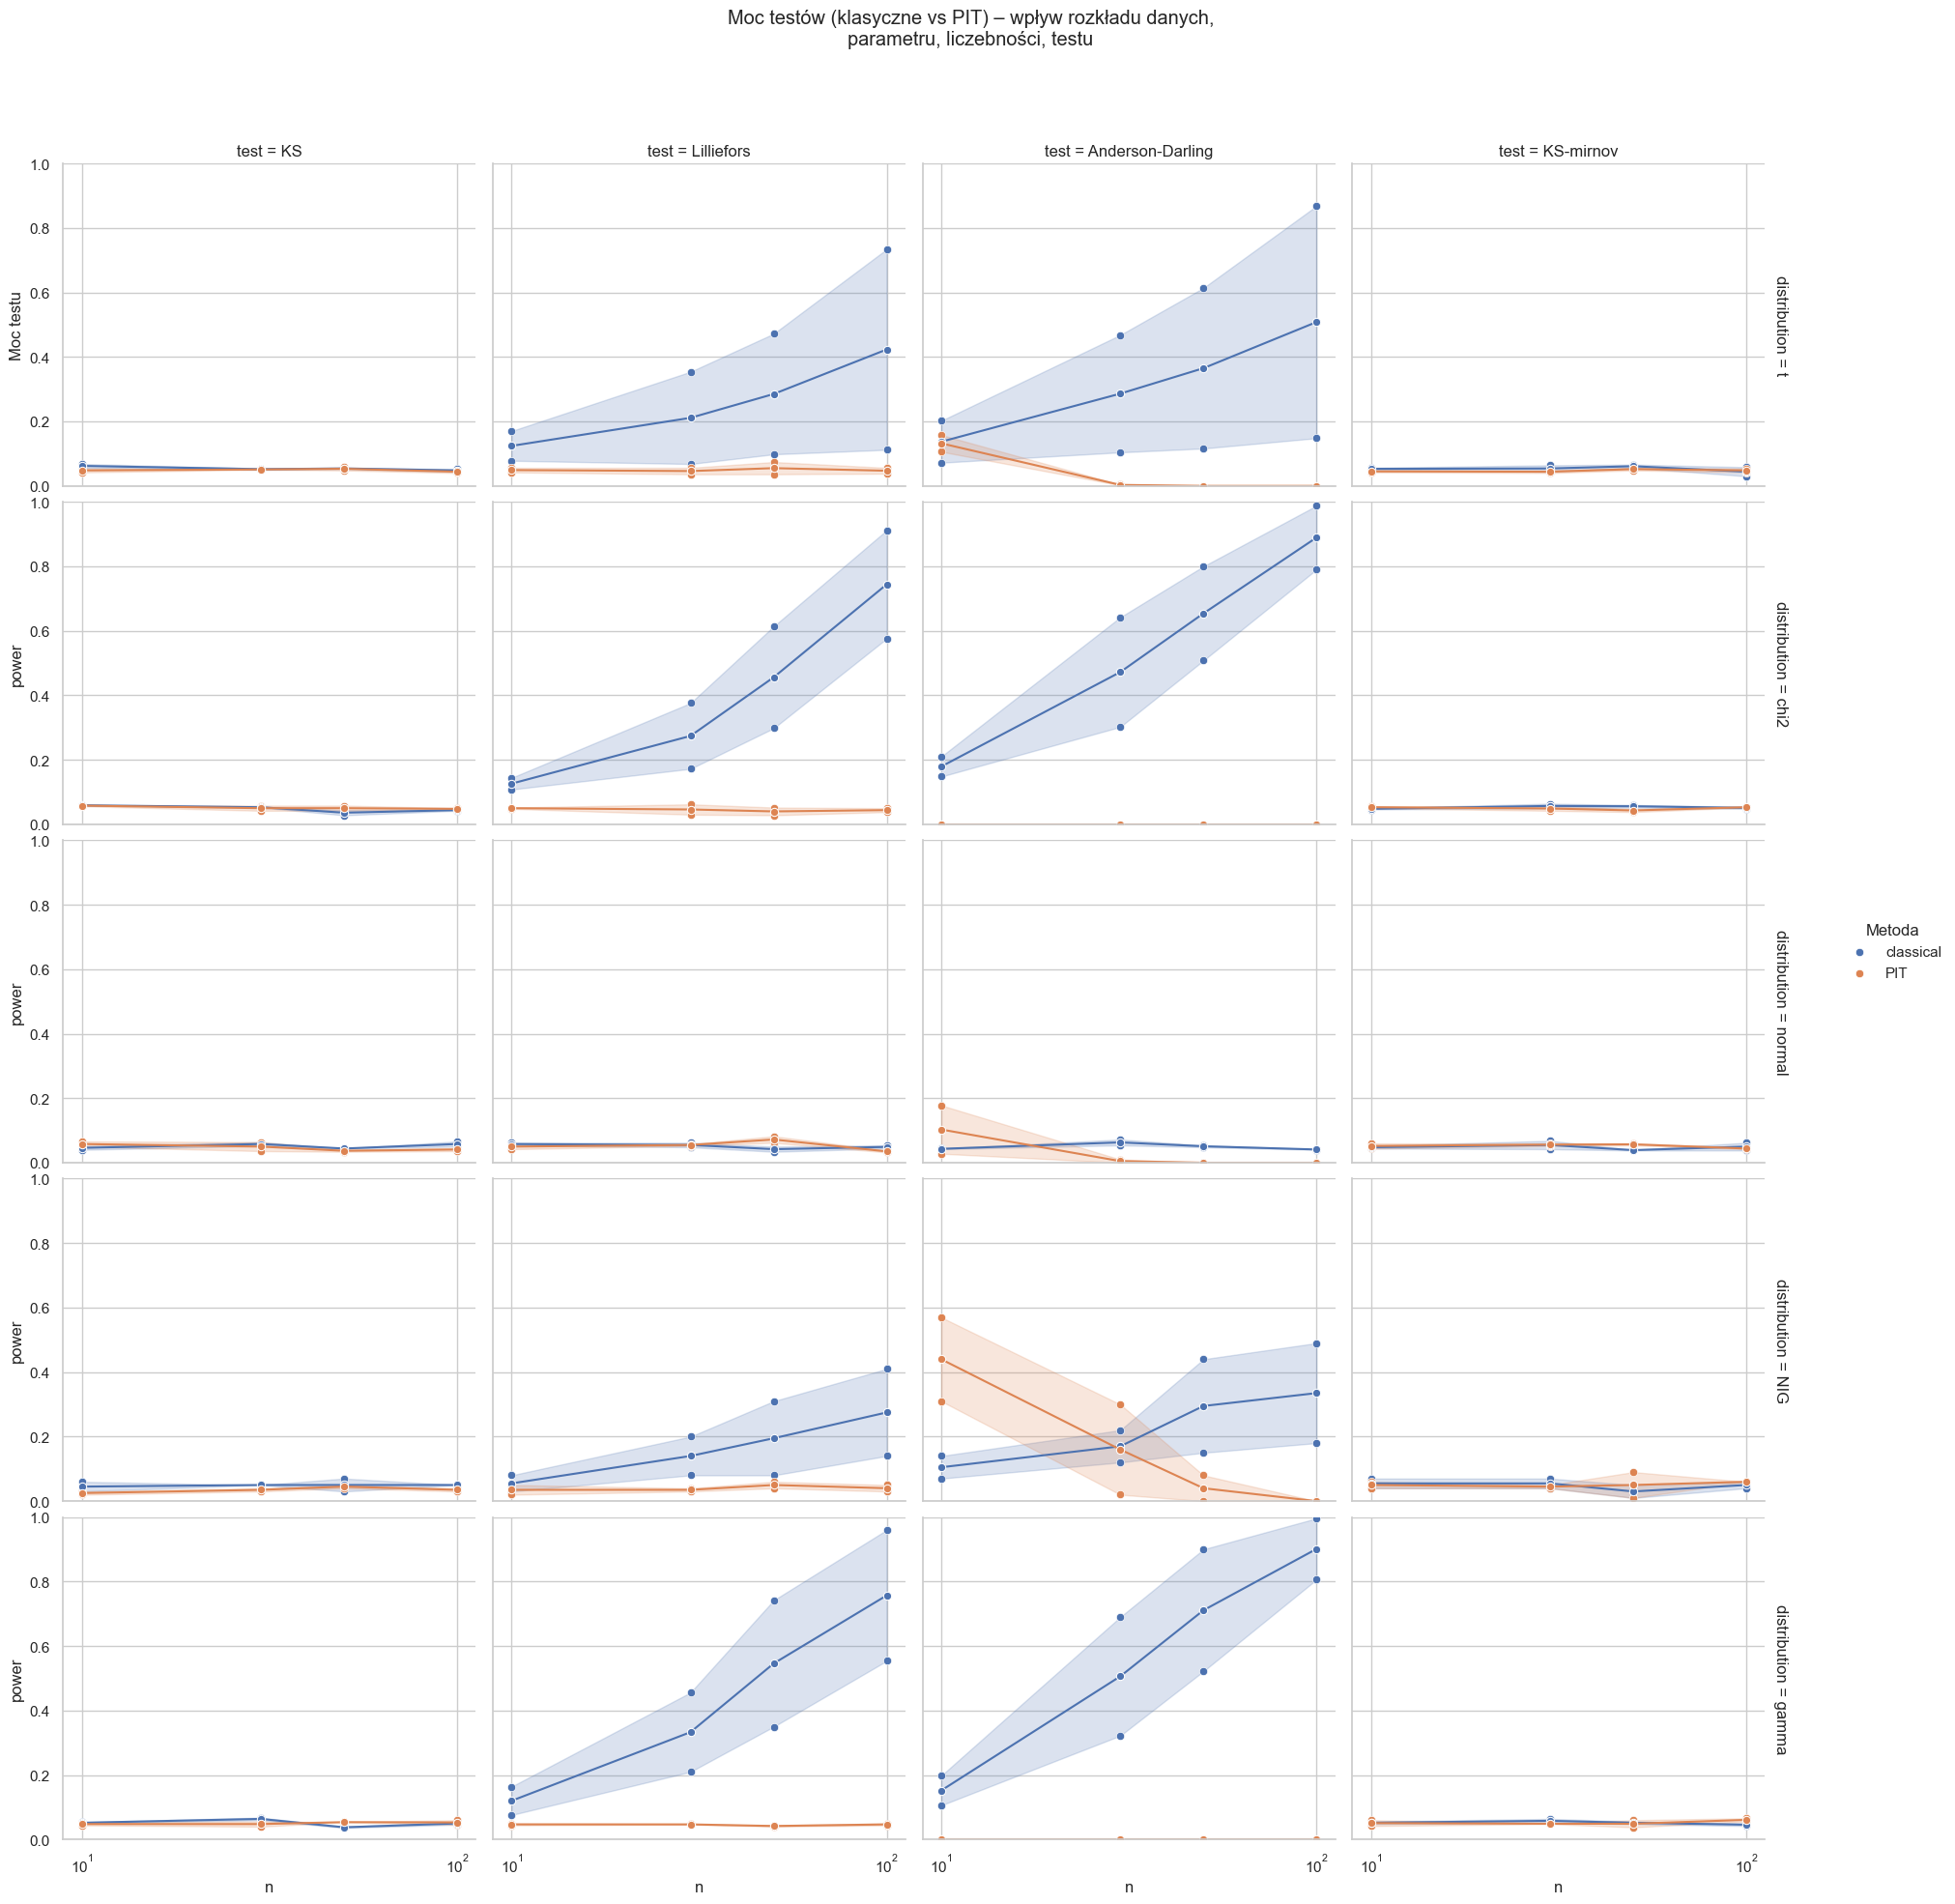

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from statsmodels.stats.diagnostic import lilliefors

sns.set(style="whitegrid")

# Definicje rozkładów do testów, wraz z pomocnicznymi funkcjami do generowania i testowania. Tak żeby było w jednym miejscu wszystko
distributions = {
	"t": {
		"generator": lambda n, p: stats.t.rvs(df=p, size=n),
		"cdf": lambda x, p: stats.t.cdf(x, df=p),
		"param_label": "df",
		"params": [3, 10]    # stopnie swobody
	},
	"chi2": {
		"generator": lambda n, p: np.random.chisquare(df=p, size=n),
		"cdf": lambda x, p: stats.chi2.cdf(x, df=p),
		"param_label": "df",
		"params": [5, 10]    # stopnie swobody
	},
	"normal": {
		# Przyjmuje średnią 0, różne odchylenie standardowe
		"generator": lambda n, p: np.random.normal(loc=0, scale=p, size=n),
		"cdf": lambda x, p: stats.norm.cdf(x, loc=0, scale=p),
		"param_label": "sigma",
		"params": [1, 2]
	},
	"NIG": {
		"generator": lambda n, p: stats.norminvgauss.rvs(a=p, b=0, size=n),
		"cdf": lambda x, p: stats.norminvgauss.cdf(x, a=p, b=0),
		"param_label": "a",
		"params": [1, 3]
	},
	"gamma": {
		"generator": lambda n, p: np.random.gamma(shape=p, scale=1.0, size=n),
		"cdf": lambda x, p: stats.gamma.cdf(x, a=p, scale=1.0),
		"param_label": "shape",
		"params": [2, 5]
	}
}

# Test KS (klasyczny) i PIT
def test_ks_classical(data, cdf_func, param):
	return stats.kstest(data, lambda x: cdf_func(x, param))[1]

def test_ks_pit(data, cdf_func, param):
	transformed = cdf_func(data, param)
	return stats.kstest(transformed, 'uniform')[1]

# Test Lillieforsa, klasyczny, dla wariantu PIT używam zwykłego KS (nie ma standardowej wersji Lillieforsa dla U(0,1))
def test_lilliefors_classical(data):
	# Zakładam test dla normalności
	stat, p_val = lilliefors(data, dist='norm')
	return p_val

def test_lilliefors_pit(data, cdf_func, param):
	transformed = cdf_func(data, param)
	return stats.kstest(transformed, 'uniform')[1]

# Test Anderson-Darling, nie daje p, dlatego zwracamy "pseudo p-value"
# Jeśli statystyka > krytyczna wartość na 5%, zwracam 0, czyli odrzucam H0, inaczej 1.
def test_anderson_classical(data, dist='norm'):
	res = stats.anderson(data, dist=dist)
	crit = res.critical_values[2]
	if res.statistic > crit:
		return 0.0
	else:
		return 1.0

# def test_anderson_pit(data, dist='uniform'):
# 	res = stats.anderson(data, dist=dist)
# 	crit = res.critical_values[2]
# 	if res.statistic > crit:
# 		return 0.0
# 	else:
# 		return 1.0
def test_anderson_pit(data, dist='uniform'):
	# Jeśli dane są wynikiem transformacji PIT, przekształcam je na rozkład wykładniczy:
	y = -np.log(1 - data) 
	res = stats.anderson(y, dist='expon')
	crit = res.critical_values[2]
	if res.statistic > crit: 
		return 0.0 
	else: 
		return 1.0

def test_ksmirnov_classical(data, cdf_func, param):
	return test_ks_classical(data, cdf_func, param)

def test_ksmirnov_pit(data, cdf_func, param):
	return test_ks_pit(data, cdf_func, param)

# Mapuję nazw testów na funkcje, każda będzie miała wersję klasyczną i PIT
test_functions = {
	"KS": {"classical": test_ks_classical, "PIT": test_ks_pit},
	"Lilliefors": {"classical": test_lilliefors_classical, "PIT": test_lilliefors_pit},
	"Anderson-Darling": {"classical": lambda data, f, p: test_anderson_classical(data, dist='norm'),"PIT": lambda data, f, p: test_anderson_pit(data, dist='uniform')},
	"KS-mirnov": {"classical": test_ksmirnov_classical, "PIT": test_ksmirnov_pit}
}

# Funkcja do symulowania mocy testów
def simulate_power(distribution, param_value, n, k, test_func, cdf_func, method):
	rejections = 0
	for _ in range(k):
		data = distribution["generator"](n, param_value)
		if method == "PIT":
			# Transformacja PIT, przekształcam dane używając teoretycznej dystrybuanty
			# w naszym rozwiązaniu funkcja cdf
			# Dla testów opartych o porównanie z U(0,1) używamy funkcji cdf
			p_val = test_func(data, distribution["cdf"], param_value)
		else:
			# Wersja klasyczna, dla testu Lillieforsa klasycznego nie potrzebujem cdf ani param_value
			try:
				p_val = test_func(data, distribution["cdf"], param_value)
			except TypeError:
				p_val = test_func(data)
		# Dla testów, których funkcja zwraca "p-value" (0-1)  odrzucam H0, gdy p_val < 0.05.
		if p_val < 0.05:
			rejections += 1
	return rejections / k

# Parametry symulacji
sample_sizes = [10, 30, 50, 100]
k_default = 500
k_NIG = 100       # mniejsza liczba iteracji dla rozkładu NIG, bo trwa długo

results = []

# Iteruję każdey rozkład, dla każdej wartości parametru, każdej liczebności, dla każdego testu i metody
for dist_name, dist_data in distributions.items():
	for p_val in dist_data["params"]:
		for n in sample_sizes:
			k_current = k_NIG if dist_name == "NIG" else k_default
			for test_name, methods_dict in test_functions.items():
				for method in ["classical", "PIT"]:
				# Symuluje moc
					print(dist_name, dist_data["param_label"], p_val, n, test_name, method)
					power = simulate_power(dist_data, p_val, n, k_current, methods_dict[method], dist_data["cdf"], method)
					results.append({
						"distribution": dist_name,
						"param_label": dist_data["param_label"],
						"param": p_val,
						"n": n,
						"test": test_name,
						"method": method,
						"power": power
					})

df_results = pd.DataFrame(results)
print(df_results.head())

g = sns.FacetGrid(df_results, row="distribution", col="test", hue="method", margin_titles=True, height=4, aspect=1.2)
g.map(sns.lineplot, "n", "power", marker="o")
g.map(sns.scatterplot, "n", "power")
for ax in g.axes.flat:
	ax.set_xscale("log")
	ax.set_ylim(0,1)
	ax.set_xlabel("Liczebność próbek")
	ax.set_ylabel("Moc testu")
	g.add_legend(title="Metoda")
	plt.subplots_adjust(top=0.9)
	g.fig.suptitle("Moc testów (klasyczne vs PIT) – wpływ rozkładu danych,\nparametru, liczebności, testu")
	plt.show()

# Zadanie 2
Wpływ liczebności danych na moc testów
Analiza mocy testów w zależności od wielkości próbki. Przeanalizować różne liczebności próbki, aby określić, jak zmienia się moc testu w miarę wzrostu liczby obserwacji.

# Zadanie 3
Analiza błędu I rodzaju
Przeprowadzenie symulacji w celu oszacowania odsetka odrzuceń prawdziwej hipotezy zerowej (błąd I rodzaju) w przypadku weryfikacji zgodności z rozkładem NIG oraz gamma. Porównanie wyników klasycznej metody testowania z metodą wykorzystującą PIT.

# Zadanie 4
Wizualizacja wyników
Wyniki analizy przedstawić w formie wykresów ilustrujących moc testów w zależności od:

- Liczebności próbki,
- Parametrów generowanych rozkładów (stopni swobody, odchylenia standardowego, parametry rozkładów NIG i gamma). Każdy wykres zostanie odpowiednio opisany i oznaczony, aby możliwa była łatwa interpretacja wyników.